In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load the dataset
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# Display the first few rows and data info
print(df.head())
print("\
Dataset Info:")
print(df.info())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

In [2]:
# Label encode binary variables
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['SMOKE'] = label_encoder.fit_transform(df['SMOKE'])

# One-hot encode multi-class variables
df = pd.get_dummies(df, columns=['MTRANS', 'NObeyesdad'])

# Remove duplicates
df = df.drop_duplicates()

# Display the first few rows to verify changes
print(df.head())
print("\
Data after encoding and removing duplicates:")
print(df.info())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0       0  21.0    1.62    64.0                            yes   no   2.0   
1       0  21.0    1.52    56.0                            yes   no   3.0   
2       1  23.0    1.80    77.0                            yes   no   2.0   
3       1  27.0    1.80    87.0                             no   no   3.0   
4       1  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC  SMOKE  ...  MTRANS_Motorbike MTRANS_Public_Transportation  \
0  3.0  Sometimes      0  ...             False                         True   
1  3.0  Sometimes      1  ...             False                         True   
2  3.0  Sometimes      0  ...             False                         True   
3  3.0  Sometimes      0  ...             False                        False   
4  1.0  Sometimes      0  ...             False                         True   

   MTRANS_Walking  NObeyesdad_Insufficient_Weight NObeye

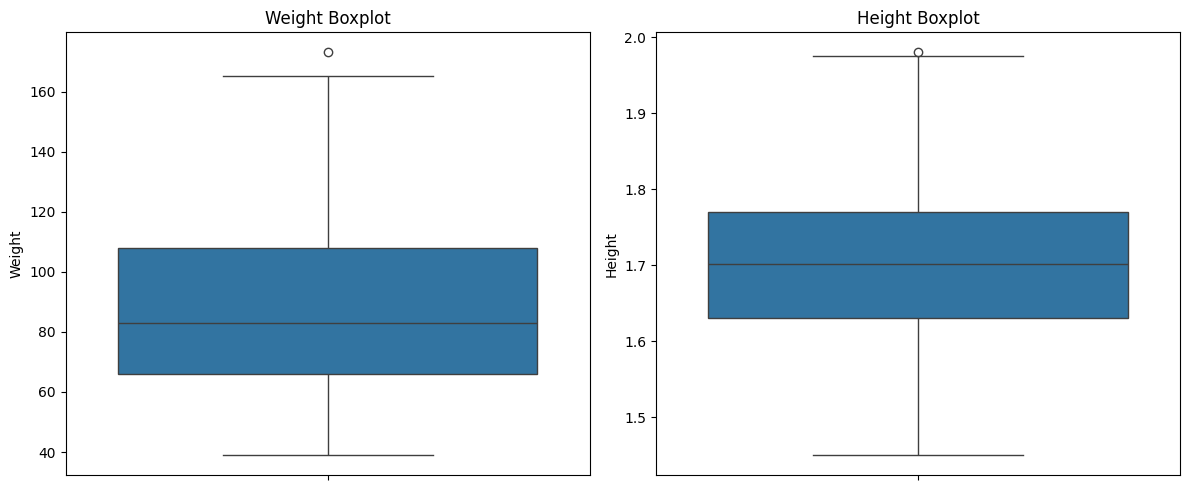

               Age       Weight       Height
count  2087.000000  2087.000000  2087.000000
mean      0.220279     0.362450     0.478131
std       0.135506     0.198333     0.176330
min       0.000000     0.000000     0.000000
25%       0.125871     0.204484     0.340949
50%       0.188247     0.333999     0.476069
75%       0.255319     0.522690     0.604570
max       1.000000     1.000000     1.000000
First few rows of processed data:
   Gender       Age    Height    Weight family_history_with_overweight FAVC  \
0       0  0.148936  0.321689  0.189337                            yes   no   
1       0  0.148936  0.132460  0.128749                            yes   no   
2       1  0.191489  0.662301  0.287792                            yes   no   
3       1  0.276596  0.662301  0.363527                             no   no   
4       1  0.170213  0.624455  0.384733                             no   no   

   FCVC  NCP       CAEC  SMOKE  ...  MTRANS_Motorbike  \
0   2.0  3.0  Sometimes      

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Assuming df is already loaded and processed from previous steps

# Create boxplots for Weight and Height
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y=df['Weight'], ax=ax1)
ax1.set_title('Weight Boxplot')
sns.boxplot(y=df['Height'], ax=ax2)
ax2.set_title('Height Boxplot')
plt.tight_layout()
plt.show()

# Function to cap outliers
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower_bound, upper_bound)

# Cap outliers for Weight and Height
df['Weight'] = cap_outliers(df['Weight'])
df['Height'] = cap_outliers(df['Height'])

# Normalize continuous variables
scaler = MinMaxScaler()
df[['Age', 'Weight', 'Height']] = scaler.fit_transform(df[['Age', 'Weight', 'Height']])

# Display summary statistics after processing
print(df[['Age', 'Weight', 'Height']].describe())

# Show the first few rows of the processed data
print("\
First few rows of processed data:")
print(df.head())

In [4]:
# Generate summary statistics for continuous variables
summary_stats = df[['Age', 'Weight', 'Height']].describe().T

# Calculate mode for each continuous variable
mode_values = df[['Age', 'Weight', 'Height']].mode().iloc[0]
summary_stats['mode'] = mode_values

# Display the summary statistics
print(summary_stats)

         count      mean       std  min       25%       50%       75%  max  \
Age     2087.0  0.220279  0.135506  0.0  0.125871  0.188247  0.255319  1.0   
Weight  2087.0  0.362450  0.198333  0.0  0.204484  0.333999  0.522690  1.0   
Height  2087.0  0.478131  0.176330  0.0  0.340949  0.476069  0.604570  1.0   

            mode  
Age     0.085106  
Weight  0.310513  
Height  0.473072  


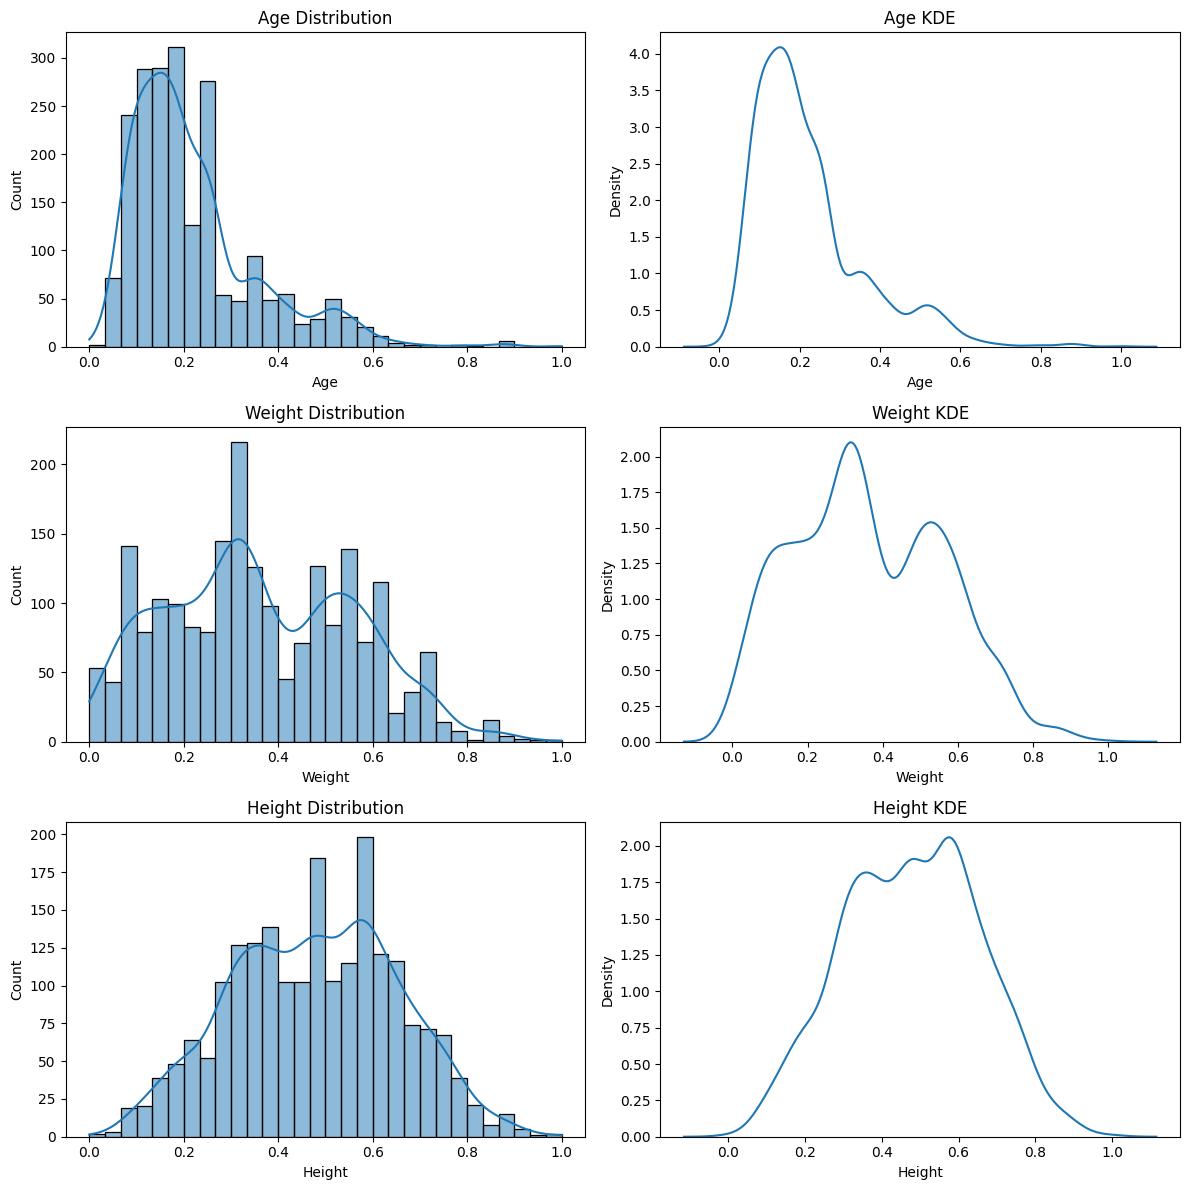

In [5]:
# Plot histograms and KDE plots for Age, Weight, and Height
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Age
sns.histplot(df['Age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')
sns.kdeplot(df['Age'], ax=axes[0, 1])
axes[0, 1].set_title('Age KDE')

# Weight
sns.histplot(df['Weight'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Weight Distribution')
sns.kdeplot(df['Weight'], ax=axes[1, 1])
axes[1, 1].set_title('Weight KDE')

# Height
sns.histplot(df['Height'], bins=30, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Height Distribution')
sns.kdeplot(df['Height'], ax=axes[2, 1])
axes[2, 1].set_title('Height KDE')

plt.tight_layout()
plt.show()

C:\Users\lilcy\AppData\Local\Temp\ipykernel_19764\1731975438.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
C:\Users\lilcy\AppData\Local\Temp\ipykernel_19764\1731975438.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')


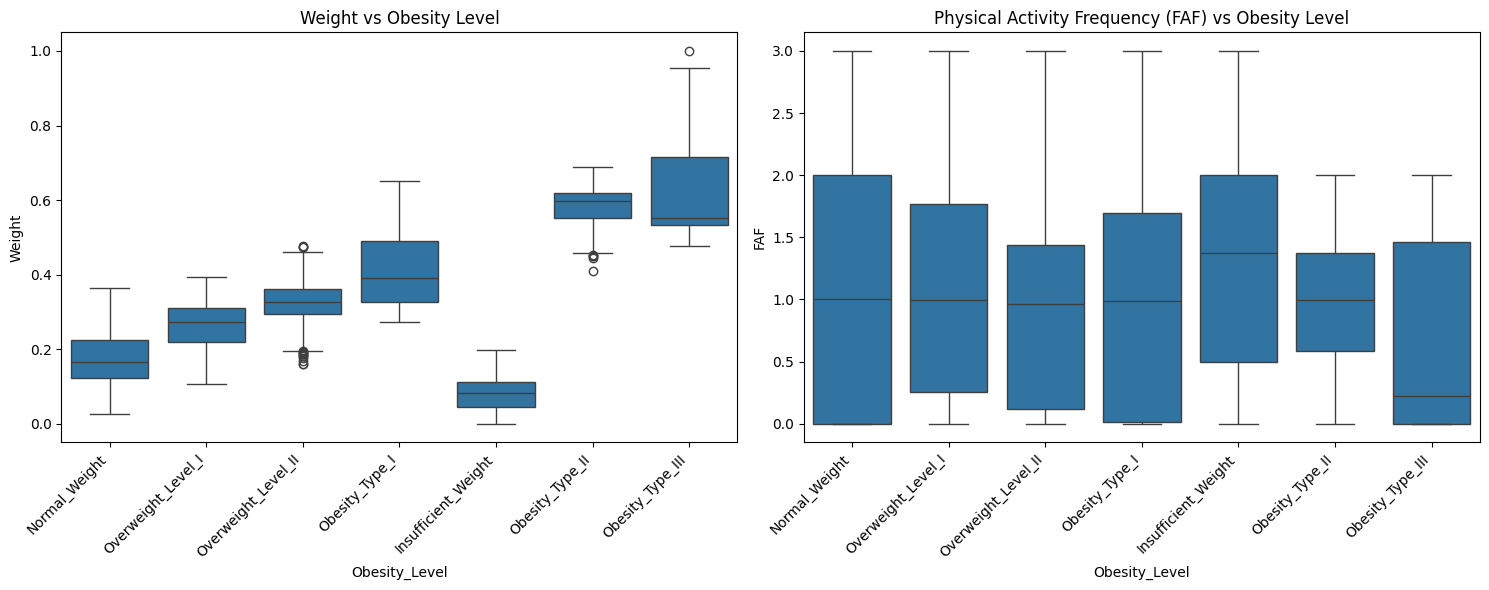

Obesity_Level  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
Weight count            267.000000     282.000000      351.000000   
       mean               0.083408       0.175439        0.407985   
       std                0.045327       0.070605        0.086989   
       min                0.000000       0.024992        0.272645   
       25%                0.043823       0.121744        0.326724   
       50%                0.083308       0.166616        0.391889   
       75%                0.111646       0.225311        0.490295   
       max                0.196910       0.363527        0.651319   
FAF    count            267.000000     282.000000      351.000000   
       mean               1.273542       1.251773        0.986748   
       std                0.847156       1.021345        0.894675   
       min                0.000000       0.000000        0.000000   
       25%                0.499050       0.000000        0.017059   
       50%                1.374670

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Recreate the obesity level column
obesity_columns = [col for col in df.columns if col.startswith('NObeyesdad_')]
df['Obesity_Level'] = df[obesity_columns].idxmax(axis=1).str.replace('NObeyesdad_', '')

# Create boxplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(x='Obesity_Level', y='Weight', data=df, ax=ax1)
ax1.set_title('Weight vs Obesity Level')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

sns.boxplot(x='Obesity_Level', y='FAF', data=df, ax=ax2)
ax2.set_title('Physical Activity Frequency (FAF) vs Obesity Level')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Display summary statistics
print(df.groupby('Obesity_Level')[['Weight', 'FAF']].describe().T)

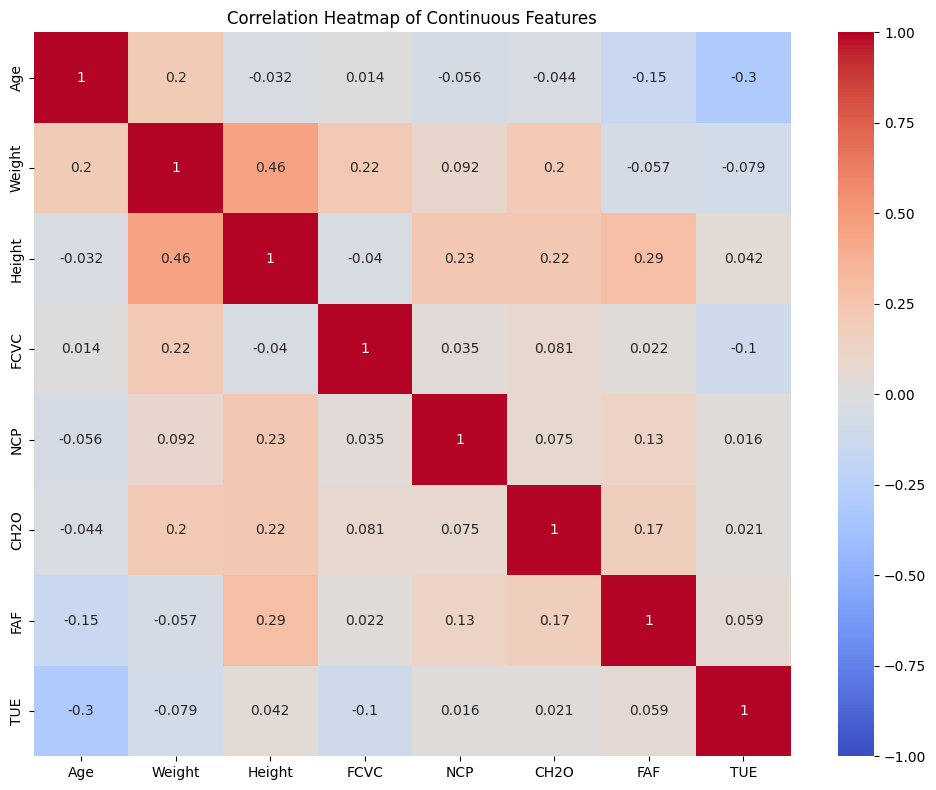

             Age    Weight    Height      FCVC       NCP      CH2O       FAF  \
Age     1.000000  0.198219 -0.031744  0.013572 -0.055823 -0.044058 -0.148202   
Weight  0.198219  1.000000  0.457456  0.216561  0.092146  0.203847 -0.056538   
Height -0.031744  0.457456  1.000000 -0.040357  0.227809  0.220479  0.293591   
FCVC    0.013572  0.216561 -0.040357  1.000000  0.034885  0.081332  0.022003   
NCP    -0.055823  0.092146  0.227809  0.034885  1.000000  0.075335  0.127816   
CH2O   -0.044058  0.203847  0.220479  0.081332  0.075335  1.000000  0.165310   
FAF    -0.148202 -0.056538  0.293591  0.022003  0.127816  0.165310  1.000000   
TUE    -0.302927 -0.079380  0.041804 -0.104128  0.015693  0.020704  0.058716   

             TUE  
Age    -0.302927  
Weight -0.079380  
Height  0.041804  
FCVC   -0.104128  
NCP     0.015693  
CH2O    0.020704  
FAF     0.058716  
TUE     1.000000  


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select continuous features
continuous_features = ['Age', 'Weight', 'Height', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Create correlation matrix
corr_matrix = df[continuous_features].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Continuous Features')
plt.tight_layout()
plt.show()

# Display the correlation matrix
print(corr_matrix)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Prepare the data
# Assuming 'df' is our dataframe and 'Obesity_Level' is our target variable
features = ['Age', 'Weight', 'Height', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
X = df[features]
y = df['Obesity_Level']

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create pairplot
sns.pairplot(df[features + ['Obesity_Level']], hue='Obesity_Level')
plt.tight_layout()
plt.savefig('pairplot.png')
plt.close()

# Train Random Forest and get feature importances
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Plot feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.savefig('feature_importances.png')
plt.close()

# Create confusion matrix
y_pred = rf.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.close()

print("Pairplot, feature importance plot, and confusion matrix heatmap have been created and saved.")
print("\
Feature Importances:")
for f, imp in sorted(zip(features, importances), key=lambda x: x[1], reverse=True):
    print(f"{f}: {imp:.4f}")

Pairplot, feature importance plot, and confusion matrix heatmap have been created and saved.
Feature Importances:
Weight: 0.3792
Height: 0.1399
Age: 0.1166
FCVC: 0.1049
NCP: 0.0680
FAF: 0.0652
TUE: 0.0650
CH2O: 0.0612


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Prepare the data
features = ['Age', 'Weight', 'Height', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
X = df[features]
y = df['Obesity_Level']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

# Implement Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)

# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print()

evaluate_model(y_test, lr_pred, "Logistic Regression")
evaluate_model(y_test, rf_pred, "Random Forest")

# Compare performance
lr_accuracy = accuracy_score(y_test, lr_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

print("Model Comparison:")
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Difference: {abs(lr_accuracy - rf_accuracy):.4f}")

Logistic Regression Performance:
Accuracy: 0.8971
Precision: 0.8996
Recall: 0.8971
F1-score: 0.8966

Random Forest Performance:
Accuracy: 0.9737
Precision: 0.9742
Recall: 0.9737
F1-score: 0.9738

Model Comparison:
Logistic Regression Accuracy: 0.8971
Random Forest Accuracy: 0.9737
Difference: 0.0766
